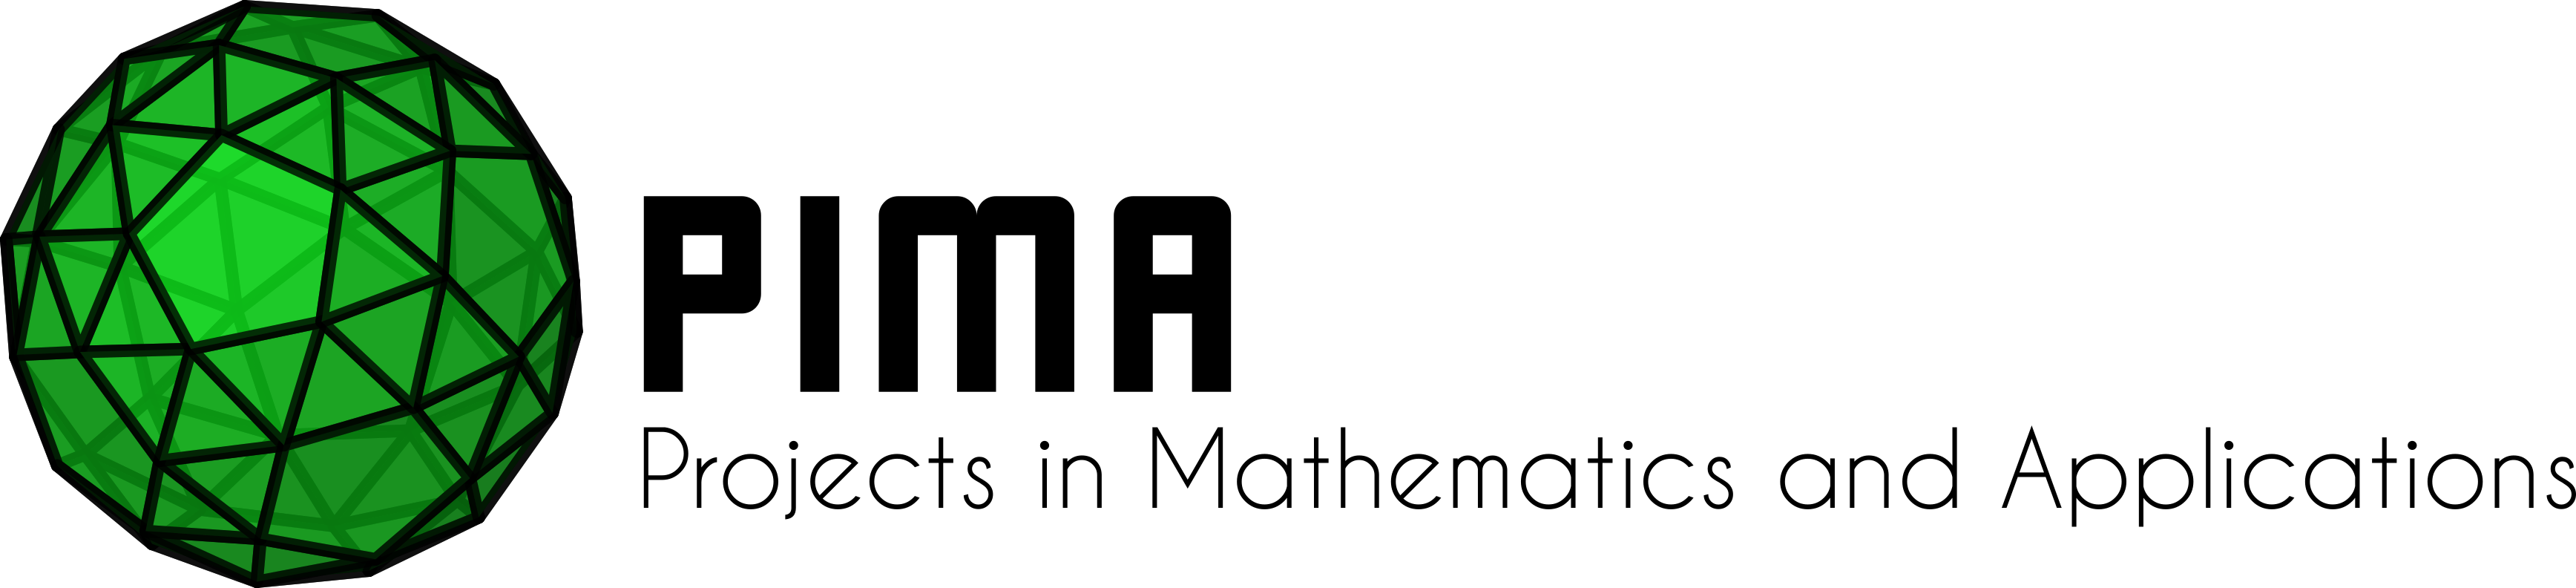

# Chu·∫©n b·ªã tr√¨nh ch·∫•m b√†i v√† th√¥ng tin h·ªçc vi√™n

In [1]:
import shutil
import subprocess
import sys

# Clean up old folders if they exist
shutil.rmtree("PiMA-GenAI-Grader", ignore_errors=True)
shutil.rmtree("grader_homework_2", ignore_errors=True)

# Clone the GitHub repo
subprocess.run(["git", "clone", "https://github.com/vongvinhtoan/PiMA-GenAI-Grader.git"], check=True)

# Move the folder
shutil.move("PiMA-GenAI-Grader/grader_homework_2", "./grader_homework_2")

# Install requirements
subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", "./grader_homework_2/requirements.txt", "--quiet"])

print("")

Cloning into 'PiMA-GenAI-Grader'...



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
student_id = 42

In [3]:
import grader_homework_2 as pima_grader
pima_grader.GradingOptimizer.optimize_for_final_grading(False)

# Import c√°c th∆∞ vi·ªán

In [4]:
from typing import *
import random
import numpy as np

In [5]:
TypeQ = TypeVar("TypeQ")  # Ki·ªÉu d·ªØ li·ªáu c·ªßa c√°c m·∫´u trong ph√¢n ph·ªëi
TypeP = TypeVar("TypeP")  # Ki·ªÉu d·ªØ li·ªáu tr·∫£ v·ªÅ c·ªßa h√†m f

# Gi·ªõi thi·ªáu b√†i t·∫≠p

Trong b√†i t·∫≠p v·ªÅ nh√† l·∫≠p tr√¨nh tu·∫ßn n√†y, ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng ng√¥n ng·ªØ l·∫≠p tr√¨nh Python ƒë·ªÉ th·ª±c hi·ªán m·ªôt s·ªë v·∫•n ƒë·ªÅ v·ªÅ suy di·ªÖn. Suy di·ªÖn trong khu√¥n kh·ªï b√†i t·∫≠p n√†y xoay quanh vi·ªác th·ª±c hi·ªán c√°c ph√¢n t√≠ch xung quanh vi·ªác t√≠nh v√† t√≠nh:
$$
\mathbb E_q[f(x)] = \int f(x)q(x)dx
$$
v·ªõi $q(\cdot)$ l√† m·ªôt h√†m m·∫≠t ƒë·ªô x√°c su·∫•t g√°n v·ªõi bi·∫øn ng·∫´u nhi√™n $x$.

Trong Notebook n√†y s·∫Ω xu·∫•t hi·ªán c√°c d√≤ng code ch√∫ th√≠ch b·∫Øt ƒë·∫ßu b·∫±ng c·ª•m t·ª´ `TODO` k√®m theo y√™u c·∫ßu, nhi·ªám v·ª• c·ªßa b·∫°n l√† ho√†n th√†nh c√°c y√™u c·∫ßu ƒë√≥.

B√†i t·∫≠p ƒë√£ cho s·∫µn c√°c b·∫°n code m·∫´u cho `x·∫•p x·ªâ Monte Carlo` c√πng v·ªõi ƒëo·∫°n code s·ª≠ d·ª•ng ƒë·ªÉ ∆∞·ªõc l∆∞·ª£ng s·ªë $\pi$. Khi nh·∫Øc ƒë·∫øn vi·ªác x·∫•p x·ªâ/∆∞·ªõc l∆∞·ª£ng s·ªë $\pi$ trong b√†i t·∫≠p n√†y, ta s·∫Ω ch·ªâ x√©t ƒë·∫øn vi·ªác x·∫•p x·ªâ:
$$
  \pi = 4 \mathbb E_q[f(\mathbf x)]
$$
v·ªõi:
- $r$ l√† b√°n k√≠nh h√¨nh tr√≤n v√† n·ª≠a ƒë·ªô d√†i c·∫°nh h√¨nh vu√¥ng ngo·∫°i ti·∫øp ƒë∆∞·ªùng tr√≤n.
- $\mathbf x$ l√† m·ªôt bi·∫øn ng·∫´u nhi√™n 2 chi·ªÅu thu·ªôc $[-r; r] \times [-r; r]$.
- $q(\mathbf x)$ l√† h√†m ph√¢n ph·ªëi x√°c su·∫•t ƒë·ªÅu tr√™n $[-r; r] \times [-r; r]$.
- $f(\mathbf x) = \begin{cases}
  1, & |\mathbf x| \le r\\
  0, & \text{else}
\end{cases}$

B√†i t·∫≠p v·ªÅ nh√† l·∫≠p tr√¨nh tu·∫ßn c√≥ **4** b√†i t·∫≠p.

## Code m·∫´u Monte Carlo v√† ∆∞·ªõc l∆∞·ª£ng s·ªë $\pi$

In [6]:
def MonteCarlo(
    q_sampler: Callable[[], TypeQ],
    f: Callable[[TypeQ], TypeP],
    N: int
) -> TypeP:
    """
    H√†m ∆∞·ªõc l∆∞·ª£ng trung b√¨nh c·ªßa m·∫´u P kh√¥ng bi·∫øt th√¥ng qua m·∫´u Q ƒë√£ bi·∫øt.

    Parameters:
    - q_sampler: H√†m l·∫•y m·∫´u ng·∫´u nhi√™n t·ª´ ph√¢n ph·ªëi Q.
    - f: H√†m √°nh x·∫° t·ª´ kh√¥ng gian m·∫´u c·ªßa Q sang P.
    - N: S·ªë l∆∞·ª£ng m·∫´u ƒë·ªÉ l·∫•y.

    Returns:
    - Gi√° tr·ªã ∆∞·ªõc l∆∞·ª£ng trung b√¨nh c·ªßa m·∫´u P.
    """

    samples = [q_sampler() for _ in range(N)]
    return 1/N * sum(f(x) for x in samples)

In [7]:
def sample_in_square(r: float) -> Callable[[], tuple[float, float]]:
    """Sinh ng·∫´u nhi√™n theo ph√¢n ph·ªëi ƒë·ªÅu trong h√¨nh vu√¥ng [-r,r] √ó [-r,r]."""

    def sampler() -> tuple[float, float]:
        x = random.uniform(-r, r)
        y = random.uniform(-r, r)
        return x, y

    return sampler

In [8]:
def is_in_circle(r: float) -> Callable[[tuple[float, float]], int]:
    """H√†m tr·∫£ v·ªÅ 1 n·∫øu ƒëi·ªÉm n·∫±m trong ƒë∆∞·ªùng tr√≤n b√°n k√≠nh r"""

    def f(p: tuple[float, float]) -> int:
        x, y = p
        return 1 if x**2 + y**2 <= r**2 else 0

    return f

In [9]:
def approx_pi_monte_carlo(r: float, N: int) -> float:
    """H√†m x·∫•p x·ªâ s·ªë pi b·∫±ng Monte Carlo"""

    def approx_func() -> float:
        return 4 * MonteCarlo(
            q_sampler = sample_in_square(r = r),
            f = is_in_circle(r = r),
            N = N
        )

    return approx_func

## Th·ª±c hi·ªán 10000 l·∫ßn x·∫•p x·ªâ $\pi$ b·∫±ng Monte Carlo v·ªõi s·ªë l∆∞·ª£ng m·∫´u 50

Th·ª±c hi·ªán x·∫•p x·ªâ œÄ b·∫±ng Monte Carlo: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:01<00:00, 7606.55it/s]


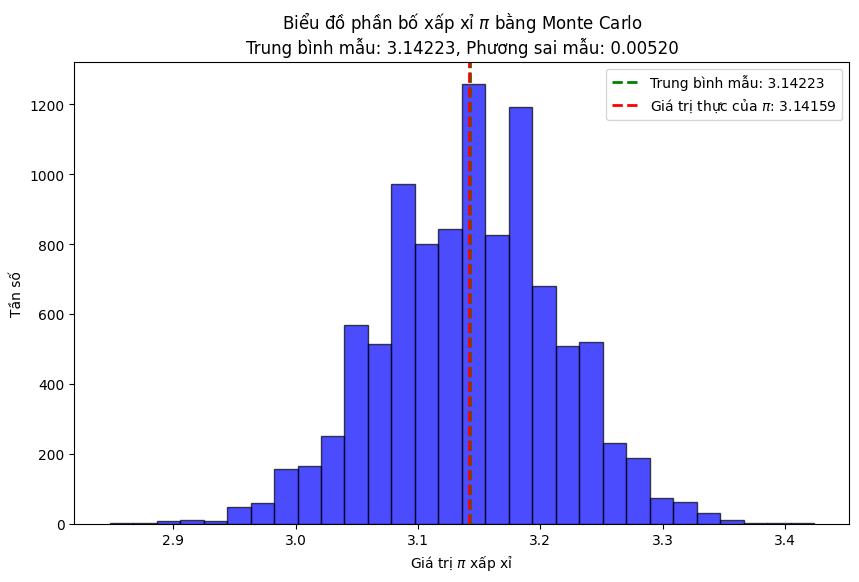

In [10]:
pima_grader.plot_approximation(
    student_id = student_id,
    approx_func = approx_pi_monte_carlo(r = 1, N = 500),
    tqdm_desc = 'Th·ª±c hi·ªán x·∫•p x·ªâ œÄ b·∫±ng Monte Carlo',
    var_name = '$\\pi$',
    true_value = np.pi,
    method_name = 'Monte Carlo',
    num_trials = 10000
)

# B√†i t·∫≠p 1

H√£y ho√†n th√†nh h√†m t·∫°o m·∫´u (`sampler`) c√πng h√†m chuy·ªÉn ƒë·ªïi ph√¢n ph·ªëi (`is_lie_across/f`) ƒë·ªÉ ∆∞·ªõc l∆∞·ª£ng x√°c su·∫•t ƒë√°p √°n cho b√†i to√°n Buffon's needle.

<div style='background-color: #e6f7ff; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid #1890ff;'>    
    <h3 style='margin: 0; color: #1890ff;'>‚ÑπÔ∏è Th√¥ng tin</h3>
    <p>ƒê·ªÉ t√¨m hi·ªÉu ƒë·ªãnh nghƒ©a v√† √Ω nghƒ©a c·ªßa b√†i to√°n <b>Buffon's needle</b>, b·∫°n c√≥ th·ªÉ tham kh·∫£o t·∫°i trang
        <a href='https://en.wikipedia.org/wiki/Buffon%27s_needle_problem' target='_blank'>Wikipedia - Buffon's needle problem</a>.
    </p>
</div>


In [11]:
import random
import math

def sample_needle(l: float, t: float) -> Callable[[], Any]:
    """Sinh ng·∫´u nhi√™n c·∫•u h√¨nh th·∫£ ng·∫´u nhi√™n c√¢y kim ƒë·ªô d√†i l v√†o t·∫•m g·ªó v·ªõi c√°c d·∫£i ƒë·ªô r·ªông t"""

    def sampler() -> Any:
        """Tr·∫£ v·ªÅ c·∫∑p kho·∫£ng c√°ch t·ª´ t√¢m c√¢y kim ƒë·∫øn d·∫£i g·∫ßn nh·∫•t v√† g√≥c gi·ªØa c√¢y kim v√† d·∫£i"""
        # Sinh ng·∫´u nhi√™n kho·∫£ng c√°ch t·ª´ t√¢m c√¢y kim ƒë·∫øn d·∫£i g·∫ßn nh·∫•t
        d = random.uniform(0, t / 2)
        # Sinh ng·∫´u nhi√™n g√≥c gi·ªØa c√¢y kim v√† d·∫£i
        theta = random.uniform(0, math.pi / 2)
        return (d, theta)

    return sampler

In [12]:
import math

def is_lie_across(l: float, t: float) -> Callable[[Tuple[float, float]], int]:
    """H√†m tr·∫£ v·ªÅ 1 n·∫øu c·∫•u h√¨nh bi·∫øn ng·∫´u nhi√™n cho bi·∫øt c√¢y kim n·∫±m gi·ªØa 2 d·∫£i"""

    def f(p: Tuple[float, float]) -> int:
        """Ki·ªÉm tra xem c√¢y kim c√≥ n·∫±m gi·ªØa 2 d·∫£i hay kh√¥ng"""
        d, theta = p  # Unpack the tuple p into d and theta
        return int(d < (l / 2) * math.sin(theta))  # Return 1 if the needle lies across, 0 otherwise

    return f

In [13]:
def approx_buffon_needle_monte_carlo(l: float, t: float, N: int) -> float:
    """H√†m x·∫•p x·ªâ s·ªë pi b·∫±ng Monte Carlo"""

    def approx_func() -> float:
        return MonteCarlo(
            q_sampler = sample_needle(l, t),
            f = is_lie_across(l, t),
            N = N
        )

    return approx_func

Th·ª±c hi·ªán x·∫•p x·ªâ Buffon Needle b·∫±ng Monte Carlo: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:01<00:00, 7665.60it/s]


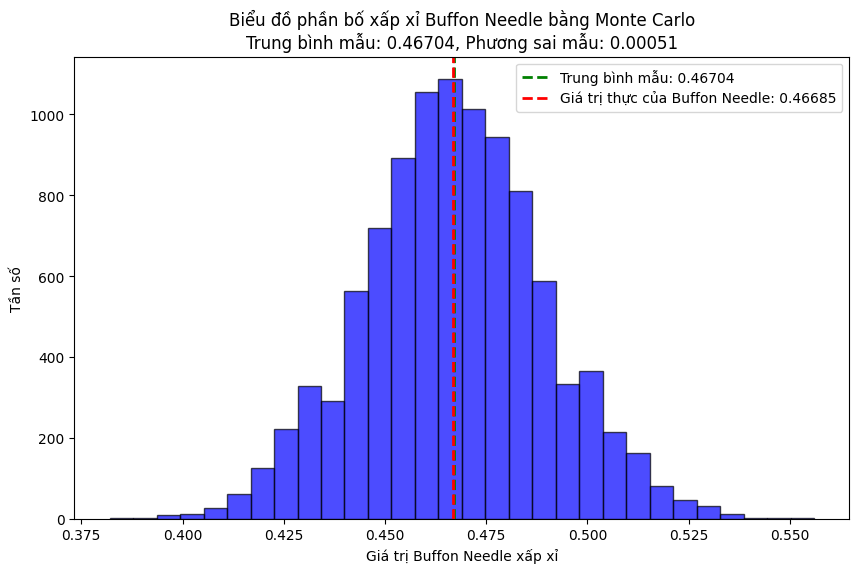

In [14]:
l = 11
t = 15

pima_grader.plot_approximation(
    student_id = student_id,
    approx_func = approx_buffon_needle_monte_carlo(l = l, t = t, N = 500),
    tqdm_desc = 'Th·ª±c hi·ªán x·∫•p x·ªâ Buffon Needle b·∫±ng Monte Carlo',
    var_name = 'Buffon Needle',
    true_value = 2 * l / np.pi / t,
    method_name = 'Monte Carlo',
    num_trials = 10000
)

# B√†i t·∫≠p 2
Ho√†n t·∫•t quy tr√¨nh cho Importance Sampling

In [15]:
def ImportanceSampling(
    q: Callable[[TypeQ], float],
    q_star: Callable[[TypeQ], float],
    q_star_sampler: Callable[[], TypeQ],
    f: Callable[[TypeQ], TypeP],
    N: int
) -> TypeP:
    """
    H√†m ∆∞·ªõc l∆∞·ª£ng trung b√¨nh c·ªßa m·∫´u P kh√¥ng bi·∫øt th√¥ng qua m·∫´u Q ƒë√£ bi·∫øt b·∫±ng
    ph∆∞∆°ng ph√°p l·∫•y m·∫´u quan tr·ªçng.

    Parameters:
    - q: H√†m m·∫≠t ƒë·ªô x√°c su·∫•t c·ªßa ph√¢n ph·ªëi m·ª•c ti√™u q.
    - q_star: H√†m m·∫≠t ƒë·ªô x√°c su·∫•t c·ªßa ph√¢n ph·ªëi ƒë·ªÅ xu·∫•t q*.
    - q_star_sampler: H√†m l·∫•y m·∫´u t·ª´ ph√¢n ph·ªëi q*.
    - f: H√†m √°nh x·∫° t·ª´ kh√¥ng gian m·∫´u c·ªßa Q v√† Q* sang P.
    - N: S·ªë l∆∞·ª£ng m·∫´u ƒë·ªÉ l·∫•y.

    Returns:
    - Gi√° tr·ªã ∆∞·ªõc l∆∞·ª£ng trung b√¨nh c·ªßa m·∫´u P.
    """
    total = 0.0
    for _ in range(N):
        # L·∫•y m·∫´u t·ª´ ph√¢n ph·ªëi ƒë·ªÅ xu·∫•t q*
        sample = q_star_sampler()
        # T√≠nh tr·ªçng s·ªë importance = q(x)/q*(x)
        weight = q(sample) / q_star(sample)
        # C·ªông gi√° tr·ªã f(sample) nh√¢n v·ªõi tr·ªçng s·ªë
        total += f(sample) * weight

    # Tr·∫£ v·ªÅ trung b√¨nh c·ªßa t·ªïng
    return total / N

# B√†i t·∫≠p 3
Cho tr∆∞·ªõc ph√¢n ph·ªëi $Q^*$ d∆∞·ªõi d·∫°ng sampler, h√£y t√¨m $q^*(x)$ (v√† $q(x)$), sau ƒë√≥ nh·∫≠n x√©t v·ªÅ l·ª±a ch·ªçn $Q^*$ ƒë∆∞·ª£c cho tr∆∞·ªõc.

In [16]:
def sampling_IS(r: float) -> Callable[[], tuple[float, float]]:
    """H√†m l·∫•y m·∫´u t·ª´ ph√¢n ph·ªëi Q* cho tr∆∞·ªõc"""

    def sampler() -> tuple[float, float]:
        k = random.uniform(0, r)
        x = random.uniform(-k, k)
        y = random.uniform(-k, k)
        return x, y

    return sampler

<div style='background-color: #fff8dc; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid orange;'>    
    <h3 style='margin: 0; color: orange;'>üí° G·ª£i √Ω: √Åp d·ª•ng x√°c su·∫•t c√≥ ƒëi·ªÅu ki·ªán</h2>
    <p>H√£y suy nghƒ© ƒë·∫øn vi·ªác s·ª≠ d·ª•ng c√°c ki·∫øn th·ª©c v·ªÅ <b>x√°c su·∫•t c√≥ ƒëi·ªÅu ki·ªán</b> ƒë·ªÉ t√¨m ra l·ªùi gi·∫£i:</p>
<span>

\begin{align}
k &\sim \text{Unif}(0, r)\\
x, y &\sim \text{Unif}(-k, k)\\
p(k) &= \begin{cases}\frac{1}{r}, & k \in [0; r] \\ 0, & \text{else}\end{cases}\\
p(x, y|k) &= \begin{cases}\frac{1}{(2k)^2}, & (x, y) \in [-k; k] \times [-k; k]\\ 0, & \text{else}\end{cases}
\end{align}
</span>
</div>

In [17]:
def in_square_pdf(r: float) -> Callable[[tuple[float, float]], float]:
    """H√†m n√†y t∆∞∆°ng ƒë∆∞∆°ng v·ªõi h√†m q(x)"""

    def f(p: tuple[float, float]) -> float:
        x, y = p
        # Check if point (x, y) is inside the square [-r, r] √ó [-r, r]
        if abs(x) <= r and abs(y) <= r:
            # Uniform PDF: 1 / area of square = 1 / (2r * 2r)
            return 1.0 / (4 * r * r)
        return 0.0

    return f

In [18]:
def pdf_IS(r: float) -> Callable[[tuple[float, float]], float]:
    """H√†m n√†y t∆∞∆°ng ƒë∆∞∆°ng v·ªõi h√†m q*(x)"""

    def f(p: tuple[float, float]) -> float:
        x, y = p
        # Check if point is inside [-r, r] √ó [-r, r]
        if abs(x) <= r and abs(y) <= r:
            m = max(abs(x), abs(y))
            # Avoid division by zero at m=0 (i.e., x=0, y=0)
            if m == 0:
                # Approximation for small m
                return (r - 0) / (4 * r**2 * 0.001)
            return (r - m) / (4 * r**2 * m)
        return 0.0

    return f

In [19]:
def approx_pi_IS(r: float, N: int) -> float:
    """H√†m x·∫•p x·ªâ s·ªë pi b·∫±ng Importance Sampling"""

    def approx_func() -> float:
        return 4 * ImportanceSampling(
            q_star_sampler = sampling_IS(r = r),
            q = in_square_pdf(r = r),
            q_star = pdf_IS(r = r),
            f = is_in_circle(r = r),
            N = N
        )

    return approx_func

Th·ª±c hi·ªán x·∫•p x·ªâ œÄ b·∫±ng Monte Carlo: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:02<00:00, 3335.87it/s]


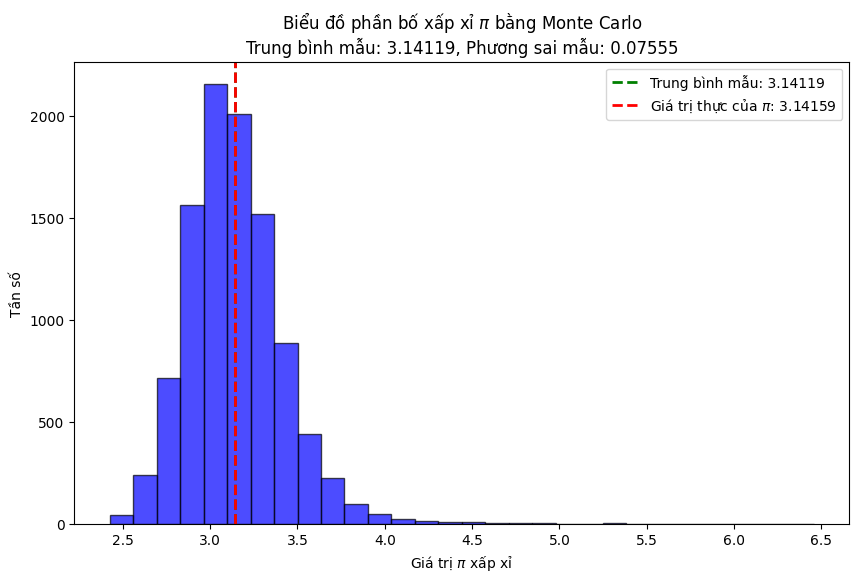

In [20]:
pima_grader.plot_approximation(
    student_id = student_id,
    approx_func = approx_pi_IS(r = 100, N = 500),
    tqdm_desc = 'Th·ª±c hi·ªán x·∫•p x·ªâ œÄ b·∫±ng Monte Carlo',
    var_name = '$\\pi$',
    true_value = np.pi,
    method_name = 'Monte Carlo',
    num_trials = 10000
)

## So s√°nh k·∫øt qu·∫£:

`TODO: H·ªçc vi√™n thay th·∫ø d√≤ng n√†y b·∫±ng nh·∫≠n x√©t c·ªßa m√¨nh`

# B√†i t·∫≠p 4

H√£y thi·∫øt k·∫ø m·ªôt ph√¢n ph·ªëi $Q^*$ (bao g·ªìm pdf v√† sampler) c√≥ th·ªÉ x·∫•p x·ªâ (b·∫±ng Importance Sampling) $\pi$ t·ªët h∆°n khi x·∫•p x·ªâ b·∫±ng Monte Carlo √≠t nh·∫•t 2 l·∫ßn:

$$
    Var_{q^*}\left[f(x)\frac{q(x)}{q^*(x)}\right] \le \frac{1}{2} Var_{q}\left[f(x)\right]
$$

<div style='background-color: #ffcccc; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid red;'>
    <h3 style='margin: 0; color: red;'>‚ùó C·∫£nh b√°o: H·∫°n ch·∫ø s·ª≠ d·ª•ng h·∫±ng s·ªë si√™u vi·ªát</h2>
    <p>V√¨ b·∫°n ƒëang th·ª±c hi·ªán ph√©p x·∫•p x·ªâ <b>œÄ</b>, vi·ªác s·ª≠ d·ª•ng h·∫±ng s·ªë œÄ trong ph√¢n ph·ªëi <b>Q<sup>*</sup></b> l√† kh√¥ng ƒë∆∞·ª£c ph√©p.</p>
    <p>N·∫øu b·∫°n s·ª≠ d·ª•ng c√°c <b>h·∫±ng s·ªë si√™u vi·ªát</b> (<i>transcendental constants</i>), k·∫øt qu·∫£ b√†i t·∫≠p n√†y s·∫Ω b·ªã h·ªßy.</p>
    <p>Tham kh·∫£o v·ªÅ s·ªë si√™u vi·ªát: <a href="https://vi.wikipedia.org/wiki/S%E1%BB%91_si%C3%AAu_vi%E1%BB%87t" target="_blank">Wikipedia - S·ªë si√™u vi·ªát</a></p>
</div>


In [26]:
def better_sampling_IS(r: float) -> Callable[[], tuple[float, float]]:


    def sampler():
        # Sample radius uniformly from [0, r] with sqrt to ensure uniform area distribution
        radius = r * math.sqrt(random.uniform(0, 1))
        angle = random.uniform(0, 2 * 3.1416)  # approximate pi
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        return (x, y)



    return sampler

In [27]:
def better_pdf_IS(r: float) -> Callable[[tuple[float, float]], float]:

    def f(p: tuple[float, float]) -> float:

        x, y = p
        if x**2 + y**2 <= r**2:
            # approximate area of circle using pi ‚âà 3.1416
            return 1 / (3.1416 * r**2)
        else:
            return 0.0


    return f

In [28]:
def better_approx_pi_IS(r: float, N: int) -> float:
    """H√†m x·∫•p x·ªâ s·ªë pi b·∫±ng Importance Sampling"""

    def approx_func() -> float:
        return 4 * ImportanceSampling(
            q_star_sampler = better_sampling_IS(r = r),
            q = in_square_pdf(r = r),
            q_star = better_pdf_IS(r = r),
            f = is_in_circle(r = r),
            N = N
        )

    return approx_func

Th·ª±c hi·ªán x·∫•p x·ªâ œÄ b·∫±ng Importance Sampling: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:02<00:00, 3652.23it/s]


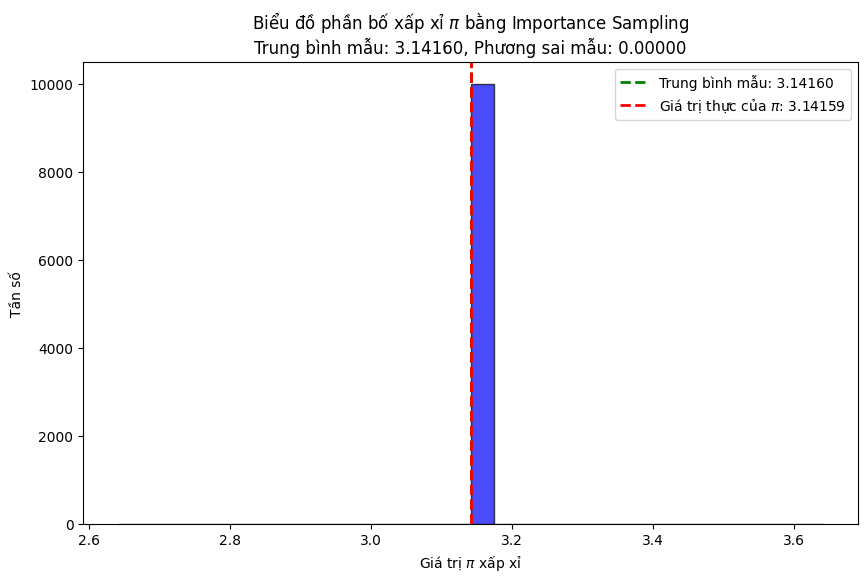

In [29]:
pima_grader.plot_approximation(
    student_id = student_id,
    approx_func = better_approx_pi_IS(r = 100, N = 500),
    tqdm_desc = 'Th·ª±c hi·ªán x·∫•p x·ªâ œÄ b·∫±ng Importance Sampling',
    var_name = '$\\pi$',
    true_value = np.pi,
    method_name = 'Importance Sampling',
    num_trials = 10000
)

# Ch·∫•m ƒëi·ªÉm

In [30]:
pima_grader.grade_all(
    sample_needle,
    is_lie_across,
    ImportanceSampling,
    in_square_pdf,
    pdf_IS,
    better_sampling_IS,
    better_pdf_IS,
    is_logging=True
)

Grading problem 1: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:00<00:00, 20231.49trial/s]


	Success rate: 0.9484
	Number of success: 9484
	Number of trials: 10000
	Alpha: 0.05
	N: 100


Grading problem 3: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:00<00:00, 17850.05trial/s]


	Mean: 3.1316
	Number of trials: 10000
	N: 100
	Score: 1.0000


Grading problem 4: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:00<00:00, 18954.29trial/s]


	Variance of q_star: 0.0000
	Variance of q: 0.0270
	Number of trials: 10000
	Score: 1.0000
	N: 100


üî• K·∫øt qu·∫£ b√†i t·∫≠p 
 
 
 
 
 B√†i 1 
 100% 
 
 
 B√†i 2 
 B√†i t·∫≠p kh√¥ng ch·∫•m 
 
 
 B√†i 3 
 100% 
 
 
 B√†i 4 
 100% 
 
 
 T·ªïng ƒëi·ªÉm 
 üéØ 100.00%